In [6]:
import sys,os
sys.path.append(os.path.abspath(".."))

In [16]:
from OldQuantumWalkModule import operators as op
from OldQuantumWalkModule.oneDimQW import *
from OldQuantumWalkModule.berry import *
from OldQuantumWalkModule.plotting import *
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import pi
from numpy.linalg import eig
from scipy.linalg import expm
from sympy import *

In [12]:
import ipywidgets as widgets
from ipywidgets import interact

In [13]:
sns.set_style("darkgrid")

In [17]:
def msigma(i : int) -> Matrix:
    if i == 1:
        return Matrix( [[0, 1], [1, 0]])
    elif i == 2:
        return Matrix( [[0, -I], [I, 0]])
    elif i == 3:    
        return Matrix( [[1, 0], [0, -1]])
    else:
        raise ValueError("Invalid index for Pauli matrix. Must be 1, 2, or 3.")

In [18]:
k,nx,ny,nz = symbols('k,n_{x},n_{y},n_{z}',Reals = True)
th1,th2 = symbols('theta,phi',Reals = True)

Id = Matrix([
    [1,0],
    [0,1]
])

Sp = exp(-I*k*(Id + msigma(3))/2)
Sm = exp(I*k*(Id-msigma(3))/2) 
C = lambda th : exp(-I * (nx * msigma(1) + ny * msigma(2) + nz * msigma(3))*th)

U = Sp * C(th1) * Sm * C(th2)


lhsE_ = simplify(simplify(U).subs({nx**2+ny**2+nz**2 : 1,nx**2+ny**2 : 1-nz**2}).subs({nx : 0 , ny : 1 , nz : 0})).subs(
    {1-exp(2*I*th1): 2*I*exp(I*th1)*sin(th1),
     1+exp(2*I*th1): 2*exp(I*th1)*cos(th1),
     1-exp(2*I*th2): 2*I*exp(I*th2)*sin(th2),
     1+exp(2*I*th2): 2*exp(I*th2)*cos(th2),
      })

In [19]:
display(collect(expand(simplify((lhsE_[0]+lhsE_[1]))),exp(I*k)))

(-sin(phi)*sin(theta) - I*sin(phi)*sin(theta) + exp(-I*theta)*sin(phi) - I*exp(-I*theta)*sin(phi) - I*exp(-I*phi)*sin(theta) + exp(-I*phi)*exp(-I*theta))*exp(-I*k) - sin(phi)*sin(theta) - I*sin(phi)*sin(theta) + exp(-I*phi)*sin(theta)

In [37]:
dim = 50
coin_dict = {"th1" : pi/11, "th2" : pi/4 , "n" : [0,1,0]}
init_state_dict = {"x0" : dim//2, "a" : 1, "b" : 1}
steps = 100

model = ss_one_dim_QW(dim,coin_dict,**init_state_dict)

In [38]:
U_k = model.momentum_U()
En = - np.angle(eig(U_k)[0])

Ep, Em = En[En > 0], En[En < 0]
k = (np.arange(0,dim)-dim//2)*(2*pi/dim)

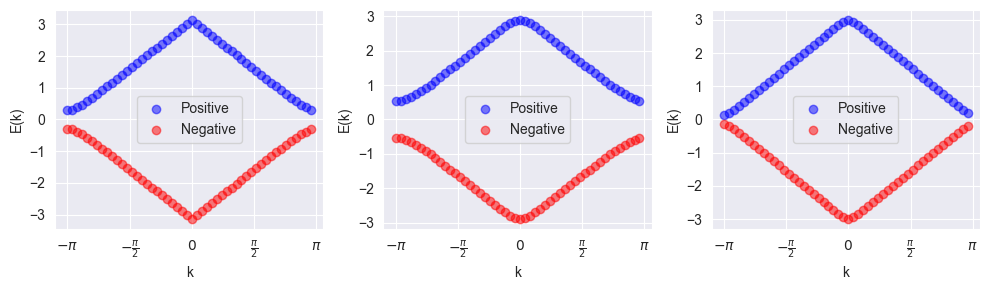

In [52]:
fig = plt.figure(figsize = (10,3))
x_tick = [-3.14, -1.57, 0, 1.57, 3.14]
x_labs = [r'$-\pi $',r'$-\frac{\pi}{2}$', r'$0$',r'$\frac{\pi}{2}$',r'$\pi$']
ths = [(pi/11, pi/11), (pi/4, pi/11), (0.00001, pi/11)]

for i, (th1,th2) in enumerate(ths):

    ax = fig.add_subplot(1,3,i+1)

    coin_dict = {"th1" : th1, "th2" : th2 , "n" : [0,1,0]}
    model = ss_one_dim_QW(dim,coin_dict,**init_state_dict)
    U_k = model.momentum_U()
    En = - np.angle(eig(U_k)[0])
    Ep, Em = En[En > 0], En[En < 0]
    k = (np.arange(0,dim)-dim//2)*(2*pi/dim)

    ax.scatter(k,Ep,color="blue",alpha=0.5, label = "Positive")
    ax.scatter(k,Em,color="red",alpha=0.5, label = "Negative")
    ax.set_xlabel("k")
    ax.set_ylabel(r"E(k)")
    plt.xticks(x_tick, x_labs)
    ax.legend()

plt.tight_layout()
plt.show()